# 新段落

   Month  No. of Adverts (X)  No. of bookings (Y)
0      1                  20                   61
1      2                  24                   77
2      3                  30                   72
3      4                  23                   66
4      5                  27                   85
5      6                  25                   77
6      7                  32                   90
7      8                  35                  100
df3.columns= Index(['Month', 'No. of Adverts (X)', 'No. of bookings (Y)'], dtype='object')
x= [[20]
 [24]
 [30]
 [23]
 [27]
 [25]
 [32]
 [35]]
y= [[ 61]
 [ 77]
 [ 72]
 [ 66]
 [ 85]
 [ 77]
 [ 90]
 [100]]
coefficient of determination (R²): 0.7541051880057117
intercept: [18.67045455]
coefficient: [[2.21590909]]
df3.columns= Index(['Month', 'No. of Adverts (X)', 'No. of bookings (Y)', 'error'], dtype='object')
df3.columns=    Month  No. of Adverts (X)  No. of bookings (Y)      error
0      1                  20                   61  -1.988636
1    

<Axes: xlabel='No. of bookings (Y)', ylabel='error'>

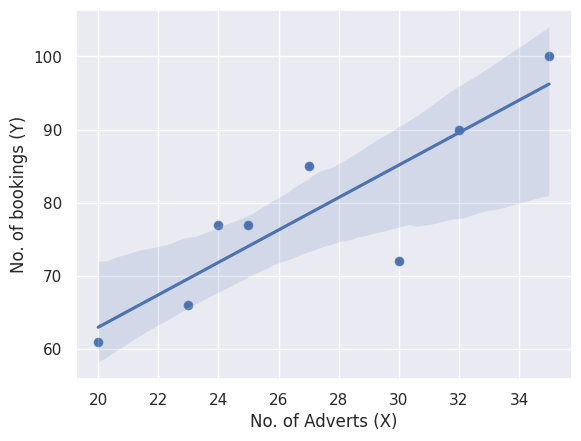

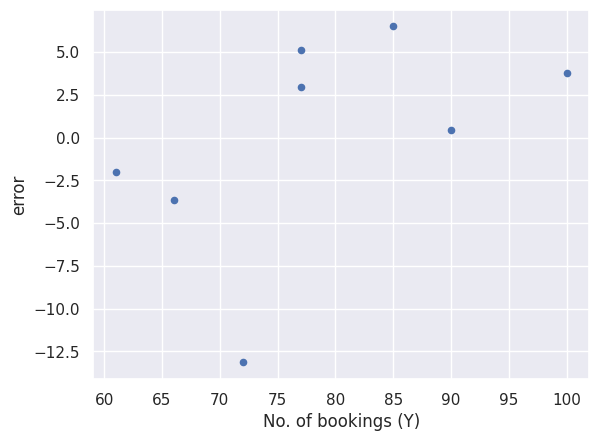

In [2]:
# 安装 PyDrive 以访问 Google Drive（适用于 Google Colab 环境）
!pip install -U -q PyDrive

# 导入 Google Drive 相关库
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 认证 Google Drive 访问权限
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 导入数据分析与可视化相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

# 读取 Google Drive 里的 CSV 文件（如果是本地运行，请直接使用 pd.read_csv()）
# downloaded = drive.CreateFile({'id':'1UVZozqcZdOX8vnM7t1DZurs2yJJpEcE4'})
# downloaded.GetContentFile('Adcampaign.csv')

# 读取广告投放数据
df3 = pd.read_csv('Adcampaign.csv')
print(df3)  # 打印数据，查看格式

# 设定 seaborn 样式进行数据可视化
sns.set()
%matplotlib inline

# 绘制散点图，查看广告数量（X）与预订数量（Y）的关系
df3.plot.scatter(x='No. of Adverts (X)', y='No. of bookings (Y)')

# 打印列名，确保数据列正确
print('df3.columns=', df3.columns)

# 绘制带有回归线的散点图
sns.regplot(x="No. of Adverts (X)", y="No. of bookings (Y)", data=df3)

# 将数据转换为 NumPy 数组，reshape(-1,1) 表示转换为 n×1 形式
# 转换为 NumPy 数组是为了构建机器学习模型，特别是 scikit-learn 这样的库通常要求输入的数据为 NumPy 数组
x = df3['No. of Adverts (X)'].to_numpy().reshape((-1, 1))  #n行一列，-1表示自动决定
y = df3['No. of bookings (Y)'].to_numpy().reshape((-1, 1))

# 打印 X 和 Y 数据
print("x=", x)
print("y=", y)

# 训练线性回归模型
model = LinearRegression().fit(x, y)

# 计算模型的决定系数（R²），用于衡量回归模型的拟合程度
r_sq = model.score(x, y)

# 预测 y 值
y_pred = model.predict(x)

# 输出回归结果
print('coefficient of determination (R²):', r_sq)  # 决定系数，衡量模型拟合程度
print('intercept:', model.intercept_)  # 截距（b）
print('coefficient:', model.coef_)  # 斜率（m）


# 计算误差（实际值 - 预测值）新增加了一个 error 列
df3['error'] = y - y_pred

# 打印列名，确保数据列正确
print('df3.columns=', df3.columns)

# 打印数据
print('df3.columns=', df3)



sns.set()  #使用 sns.set() 后，背景带有灰色网格，更容易观察数据趋势。

%matplotlib inline
#让Matplotlib绘制的图像直接显示在 Notebook 的输出单元格中

# 误差图，查看误差分布，误差之间不应该相互影响
df3.plot.scatter(x='No. of bookings (Y)', y='error')

# 创建新数据表，重命名列名，方便使用公式建模
df4 = df3.rename(columns={"No. of bookings (Y)": "Y", "No. of Adverts (X)": "X"})

# 使用 OLS（最小二乘法）进行线性回归
formula_str = "Y ~ X"
result = sm.OLS.from_formula(formula_str, data=df4).fit()
print(result.summary())  # 输出回归分析摘要

# 另一种不使用截距项的回归（Y ~ 0 + X），适用于强制通过原点的情况
formula_str = "Y ~ 0 + X"
result = sm.OLS.from_formula(formula_str, data=df4).fit()
print(result.summary())
#R-squared (uncentered) Adj. R-squared (调整后的R²):                   0.754   R²越接近1，模型对数据的拟合越好
#P-values help in assessing the significance of individual predictors, and R-squared indicates the proportion of variance explained by the model.

#F-statistic (F统计量): 18.40，检验回归模型是否有效，越大越好。对应的 Prob (F-statistic) 是 0.00515，越小越好 表示回归模型整体显著。
#Null Hypothesis 所有自变量的系数均为零
#Alternative Hypothesis 至少有一个自变量的系数不为零

#Log-Likelihood (对数似然值): -25.598，这是回归模型的对数似然值，主要用于模型比较。


#AIC (Akaike Information Criterion赤池信息量准则): 55.20，模型的复杂度与拟合优度之间的平衡，值越小越好。
#BIC (Bayesian Information Criterion 贝叶斯信息准则): 55.36，也是类似AIC的准则，用于模型比较，越小越好。

#Intercept (截距): 18.6705，表示当自变量 X 为0时，预测值 Y 的估计值。注意，在统计学上，截距的显著性（即 p 值）较高（0.235），这表明它可能不是非常显著。
#X (自变量的系数): 2.2159，表示自变量 X 每增加 1，因变量 Y 增加 2.2159。这个系数的 p 值是 0.005，远小于 0.05，表明它在统计上是显著的。

#Jarque-Bera 检验 数据集的残差residual是否符合正态分布（normally distributed） 统计量：1.643，p-value = 0.44 结论：由于 p-value > 0.05，说明误差项没有显著偏离正态分布。


# Durbin-Watson 检验回归模型残差residual中的自相关性autocorrelation  统计量：1.5<2.16<2.5  结论：Durbin-Watson 值在 1.5 到 2.5 之间，说明误差项之间没有显著的自相关性，即误差项是独立的。


#误差项符合正态分布（p-value = 0.44，不显著）
#X 变量显著影响 Y（p-value = 0.005，显著）
#误差项是独立的（Durbin-Watson = 2.16，合格）
#模型拟合度较高（R² = 0.75，但不能仅凭 R² 评估模型）

#相关性分析不能替代回归分析，因为它无法区分因果关系，也不能处理多变量问题。
#模型选择要结合 AIC、BIC、p 值、R² 和误差分析综合判断。













import statsmodels.api as smd
duncan_prestige= smd.datasets.get_rdataset("Prestige", "carData")

print(duncan_prestige.__doc__)
print(duncan_prestige.data.head(5))
print(duncan_prestige.data)
print(duncan_prestige.data.groupby(by=["rownames"]).sum())
#duncan_prestige.data['education']
display(duncan_prestige.data.groupby(by=["rownames"]).count())



#职业声望解法1
import statsmodels.api as sm
import pandas as pd

# Load the Prestige dataset
duncan_prestige = sm.datasets.get_rdataset("Prestige", "carData")

# Show the first 5 rows of the data
print(duncan_prestige.data.head())

# Select the relevant columns for analysis (excluding 'type' and 'census')
data = duncan_prestige.data[['education', 'income', 'women', 'prestige']]

# Define the independent variables (X) and the dependent variable (Y)
X = data[['education', 'income', 'women']]
Y = data['prestige']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(Y, X).fit()

# Print the summary of the regression results
print(model.summary())

#independent variable：education（教育年限），income（收入），和 women（女性比例）。
#dependent variable：prestige

#R-squared: 0.798，表示回归模型可以解释 79.8% 的 prestige 变量的变化。这是一个比较高的值，表明自变量（教育年限、收入和女性比例）能够较好地预测声望。

#F-statistic: 129.2，这是用来测试回归模型中自变量的整体显著性。其 p 值为 6.26e-34，远小于 0.05，表明模型的整体效果是显著的。

#常数项 (const):coef = -6.7943，这表示如果所有自变量（教育、收入、女性比例）都为 0，prestige 将为 -6.7943。由于这些值没有实际意义，常数项主要用于调整回归方程。

#coef = 4.1866，每增加一年的教育，职业的声望（prestige）会增加 4.1866 分。这表明教育对声望有显著的正面影响，且 p 值为 0.000，小于 0.05，表示这个变量在模型中显著。



#解法2
df3=duncan_prestige.data
sns.set()
%matplotlib inline
df3.plot.scatter(x='education', y='prestige')

corr = df3[['education','income','women']].corr()
corr.style.background_gradient(cmap='coolwarm')

df4=df3
formula_str="prestige~education+income+women"

print(df4.describe())
result=smf.ols(formula=formula_str,data=df4).fit()
print(result.summary())


formula_str="prestige~education+income"

print(df4.describe())
result=smf.ols(formula=formula_str,data=df4).fit()
print(result.summary())

#education 的 p-value 是 0.000，表明教育水平对 prestige 具有显著影响。
#income 的 p-value 也是 0.000，表明收入对 prestige 也具有显著影响。
#women 的 p-value 是 0.770，说明 women 对 prestige 影响不显著，因此可以选择不包括在模型中。
#所以，最终选择 education 和 income 作为模型中的自变量，而不包括 women。


df4['resid']=result.resid
df4['predict']=result.predict()
df4.plot.scatter( x='predict',y='resid')
print(result)
#如果你在 残差图（df4.plot.scatter(x='predict', y='resid')）中没有看到明显的模式或趋势，那通常是一个好兆头，说明模型的拟合没有显著的问题。





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])


df.describe()


#df['gmat_t']=(df['gmat']-df['gmat'].min())/(df['gmat'].max()-df['gmat'].min())
#print(df['gmat_t'])
#df['gpa']=df['gpa']-df['gpa'].mean()
#df['work_experience']=df['work_experience']-df['work_experience'].mean()
#df['gmat']=df['gmat']-df['gmat'].mean()
sns.countplot(x='admitted',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')


sns.set()
%matplotlib inline
df.plot.scatter(x='gpa', y='work_experience')

sns.set()
%matplotlib inline
df.plot.scatter(x='gpa', y='gmat')

corr = df[['gpa','work_experience','gmat']].corr()
corr.style.background_gradient(cmap='coolwarm')


from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant
X=df[['gpa','work_experience','gmat']]
X = add_constant(X)
y=df['admitted']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]
#VIF（方差膨胀因子，Variance Inflation Factor）用于检测多重共线性
print(vif[1:])



import statsmodels.api as sm

import statsmodels.discrete.discrete_model as sml
X=df[['gpa','gmat','work_experience']]
#X=df[['gpa','work_experience']]
#X = add_constant(X)
#X=df[['work_experience']]
logit = sml.Logit(y, X).fit()
print(logit.summary())

import statsmodels.api as sm

import statsmodels.discrete.discrete_model as sml
X=df[['gpa','gmat','work_experience']]
#X=df[['gpa','work_experience']]
#X = add_constant(X)
#X=df[['work_experience']]
logit = sml.Logit(y, X).fit()
print(logit.summary())


# Pseudo R-squ.:                  0.5731  值越高表示模型拟合效果越好。
#似然比检验（Likelihood Ratio Test）的 p 值，用来衡量模型相较于 零模型（null model） 是否显著更好。p 值极小（远小于 0.05），说明这个模型是有统计学意义的
#gpa 的 p 值 = 0.032（小于 0.05），表示其对录取结果有显著影响。

confusion_matrix = pd.crosstab(y, np.round_(logit.predict(),0), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


#accuracy (correct decisions/total no. of decisions)
#precision (True positives/(True Positives+False Positivies))
#recall (True positives/(True Positives + False Negatives))
#f1-scrore (Formula including precision and recall)
#support (The number of items in the class)

from sklearn.metrics import classification_report
print(classification_report(y, np.round_(logit.predict(),0)))



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y, logit.predict(X))
fpr, tpr, thresholds = roc_curve(y, logit.predict(X))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()











#https://drive.google.com/file/d/1_7ttss_S-I4mmLqWoMjOvwddWfAvAx5Q/view



import pandas as pd

from google.colab import data_table
df  = pd.read_csv('iris_data.csv')

data_table.enable_dataframe_formatter()
df

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df3 = pd.read_csv('iris_data.csv')
df3.loc[df3['Species']!='setosa','y']=0
df3.loc[df3['Species']!='versicolor','y']=1
df3.loc[df3['Species']!='virginica','y']=2

df3['y'] = df3['Species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})#分配新值
print(df3)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df3.describe())
  #print(df3.groupby('Species').describe())
  print(df3.groupby('Species').describe().unstack(1))


  df3.loc[df3['Sepal.Length']<40]


#loc 的第二个参数指定了要修改的列
  df3.loc[df3['Sepal.Length']==540,'Sepal.Length']=df3.loc[(df3['Sepal.Length']<540) & (df3['Species']=='setosa'),'Sepal.Length' ].mean()
print(df3.describe())




#在 pandas 中，fillna() 用于填充缺失值（NaN）
df3.loc[(df3['Species']=='setosa'),'Sepal.Width']=df3.loc[(df3['Species']=='setosa'),'Sepal.Width'].fillna(df3.loc[(df3['Species']=='setosa'),'Sepal.Width'].mean())

df3.loc[df3['Species'] == 'setosa', 'Petal.Length'] = df3.loc[df3['Species'] == 'setosa', 'Petal.Length'].fillna(df3['Petal.Length'].mean())


#df3=df3.loc[df3['Sepal.Length']<540]
with pd.option_context('display.max_rows', None, 'display.max_columns', None): #显示所有行 显示所有列
 # print(df3.describe())
  print(df3.groupby('Species').describe())
#)



%matplotlib inline
sns.countplot(x='Species',data=df3,palette='hls')
plt.show()
plt.savefig('count_plot')


corr = df3[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].corr()
corr.style.background_gradient(cmap='coolwarm')


sns.set()
%matplotlib inline
df3.plot.scatter(x='Sepal.Length', y='Petal.Width')




from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant


X=df3[['Sepal.Length','Sepal.Width','Petal.Length']]
X = add_constant(X)

vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])




#3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
df=df3
#print(df)
#df=df3.loc[df3['Petal.Length']>=2.5]

# Create data
g1=(df.loc[df['Species']=='setosa','Sepal.Width'].to_numpy(),df.loc[df['Species']=='setosa','Sepal.Length'].to_numpy(),df.loc[df['Species']=='setosa','Petal.Width'].to_numpy())
g2=(df.loc[df['Species']=='versicolor','Sepal.Width'].to_numpy(),df.loc[df['Species']=='versicolor','Sepal.Length'].to_numpy(),df.loc[df['Species']=='versicolor','Petal.Width'].to_numpy())
g3=(df.loc[df['Species']=='virginica','Sepal.Width'].to_numpy(),df.loc[df['Species']=='virginica','Sepal.Length'].to_numpy(),df.loc[df['Species']=='virginica','Petal.Width'].to_numpy())

data = (g2, g1, g3)


colors = ("red", "green", "blue")
groups = ( "versicolor","setosa", "virginica")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
ax = fig.gca(projection='3d')

#changing the view on the 3d plot

#ax.view_init(0, 45)

for data, color, group in zip(data, colors, groups):
    x, y, z = data
#    ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    ax.scatter(x,y , z, alpha=0.8,c=color,s=30, label=group)

plt.title('Matplot 3d scatter plot')
plt.legend(loc=2)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Sepal.Length')
ax.set_zlabel('Petal.Width')
plt.show()




from sklearn.model_selection import train_test_split

df3.loc[df3['Petal.Width'] <=0.75,'y_pred_1']=1
df3.loc[df3['Petal.Width'] >0.75,'y_pred_1']=0
df3.loc[df3['Species']!='setosa','y_actual_1']=0
df3.loc[df3['Species']=='setosa','y_actual_1']=1

print(df3)

from sklearn.metrics import classification_report
print(classification_report(df3['y_pred_1'],df3['y_actual_1']))

confusion_matrix = pd.crosstab(df3['y_pred_1'], df3['y_actual_1'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)







from sklearn.model_selection import train_test_split

df3.loc[df3['Species']!='versicolor','plant_type']=1
df3.loc[df3['Species']=='versicolor','plant_type']=0
df=df3.loc[df3['Species']!='setosa']

## try centering the variables
#df.loc[df['Sepal.Length']>0,'Sepal.Length']=df['Sepal.Length']-df['Sepal.Length'].mean()
#df.loc[df['Sepal.Width']>0,'Sepal.Width']=df['Sepal.Width']-df['Sepal.Width'].mean()
#df.loc[df['Petal.Length']>0,'Petal.Length']=df['Petal.Length']-df['Petal.Length'].mean()
#print(df)
#,'Sepal.Length'
df.drop(['Petal.Length'], axis=1)
train, test = train_test_split(df[['y','plant_type','Petal.Width','Sepal.Width','Sepal.Length']], test_size=0.2)

import statsmodels.api as sm

import statsmodels.discrete.discrete_model as sml

print(train)

X=train.iloc[:,2:5]

X_test=test.iloc[:,2:5]
X = add_constant(X)
X_test = add_constant(X_test)

y=train['plant_type']
y_test=test['plant_type']

logit = sml.Logit(y, X).fit()
print(logit.summary())




from sklearn.metrics import classification_report
print(classification_report(y, np.round_(logit.predict(X),0)))


confusion_matrix = pd.crosstab(y, np.round_(logit.predict(X),0), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)












from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logreg = LogisticRegression()
#logreg.fit(X, y)
logit_roc_auc = roc_auc_score(y, logit.predict(X))
#logreg.predict_proba(X)[:,1]
fpr, tpr, thresholds = roc_curve(y,logit.predict(X))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



confusion_matrix = pd.crosstab(y_test, np.round_(logit.predict(X_test),0), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)



